In [4]:
import pandas as pd
import seaborn as sns
from data_processing_functions import parameter_tuning_read_and_mean
csv_path = "/home/jens/masterData/AlgorithmTuner/ScoreThresholdTuning/2021-09-03-09-05-34-data.csv"
tested_parameter = "BL/Score Threshold"

df =  pd.read_csv(csv_path,usecols=["objName",tested_parameter,"f1","precision","recall","accuracy"],dtype={"algName":"category","objName":"category"})
df = df.groupby(["objName",tested_parameter]).mean().reset_index()
df.head()

,objName,BL/Score Threshold,precision,recall,accuracy,f1
0,AngleTubes,0.0,0.674187,1.0,0.674187,0.768801
1,AngleTubes,0.5,0.674187,1.0,0.674187,0.768801
2,AngleTubes,1.0,0.674187,1.0,0.674187,0.768801
3,AngleTubes,1.5,0.674187,1.0,0.674187,0.768801
4,AngleTubes,2.0,0.674187,1.0,0.674187,0.768801


<AxesSubplot:xlabel='BL/Score Threshold', ylabel='f1'>

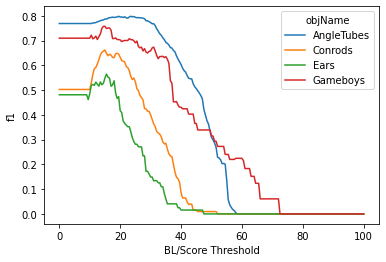

In [13]:

validation_measure = ["f1","precision","recall","accuracy"]
fig,axes = plt.subplots(1,len(validation_measure))
for ax, v in zip(axes,validation_measure)
sns.lineplot(x=tested_parameter,y="f1",hue="objName",data=df)

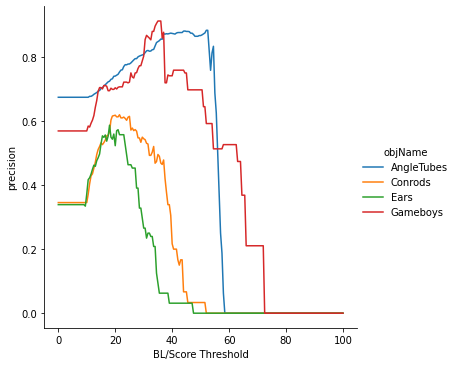

In [8]:
sns.relplot(x=tested_parameter,y="precision",hue="objName",kind="line",data=df)

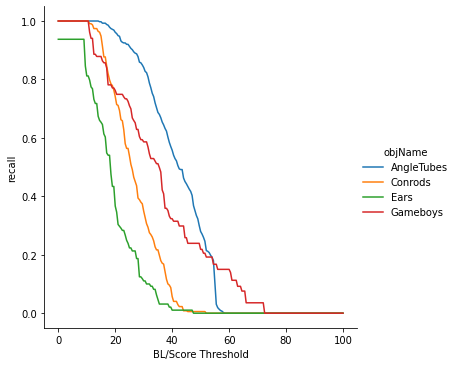

In [9]:
sns.relplot(x=tested_parameter,y="recall",hue="objName",kind="line",data=df)

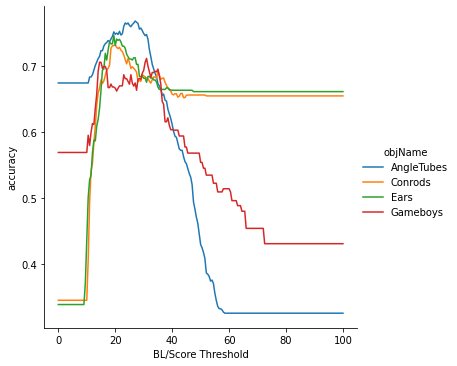

In [10]:
sns.relplot(x=tested_parameter,y="accuracy",hue="objName",kind="line",data=df)